 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [44]:
whale_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [45]:
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [46]:
whale_df.dropna(inplace = True)

In [47]:
# Finding out the non-null count and datatype by using the .info() method
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [48]:
# Finding basic statistical data using .describe() method
whale_df.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [49]:
# Check for any missing data
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [50]:
# There is one missing data for each column. Use dropna to drop the missing data
whale_df.dropna(inplace = True)

In [51]:
# Check cleaned data
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [52]:
algo_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [53]:
algo_df.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [54]:
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [55]:
algo_df.describe()

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [56]:
# Check for any missing data
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [57]:
# Dropna to clean data
algo_df.dropna(inplace = True)

In [58]:
algo_df.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [59]:
snp_path = Path('Resources/sp_tsx_history.csv')
snp_df = pd.read_csv(snp_path, index_col = 'Date', infer_datetime_format = True, parse_dates = True)

In [61]:
snp_df.head(5)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [62]:
# Check non-null counts and datatypes using .info() method
snp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [63]:
snp_df.describe()

,Close
count,1818
unique,1814
top,"$16,074.30"
freq,2


In [64]:
# Close data has $ and , signs which makes it unable to convert its data type to float. 
# Get rid of them and change Close column type to float
snp_df['Close'] = snp_df['Close'].str.replace('$', '').str.replace(',', '').astype(float)

In [67]:
# Create a new column called 'S&P daily return' that shows the daily return of S&P TSX 60
snp_df['S&P_daily_return'] = snp_df['Close'].pct_change()

In [68]:
# Check for null data
snp_df.isnull().sum()

Close               0
S&P_daily_return    1
dtype: int64

In [70]:
# Drop null data
snp_df.dropna(inplace = True)

In [71]:
# Close column is not needed anymore so remove it
snp_df.drop(['Close'], axis = 1, inplace = True)

In [72]:
snp_df.head()

,S&P_daily_return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [73]:
combined_df = pd.merge(left = whale_df, right = algo_df, how = 'inner', left_index = True, right_index = True)
combined_df = pd.merge(left = combined_df, right = snp_df, how = 'inner', left_index = True, right_index = True)

In [74]:
combined_df.columns = combined_df.columns.str.replace(' ', '_')

In [76]:
combined_df.tail(5)

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [44]:
# Plot daily returns of all portfolios


In [201]:
# Created a function called graph_maker which will plot graph using the date parameters. 
def graph_maker(df, start_date = '2015-03-03', end_date = '2019-05-01'):
    lst = list(df.columns)
    plt.figure(figsize = [30,15])
    for i in lst:
        plt.plot(df[i][start_date:end_date])
    plt.title(input('Title of the graph:'), fontdict = {'fontsize': 30, 'fontweight': 'bold'})
    plt.legend(labels = lst)
    plt.xlabel(input('X label:'), fontdict = {'fontsize': 15})
    plt.ylabel(input('Y label:'), fontdict = {'fontsize': 15})


Title of the graph: Daily returns of various portfolios
X label: Date
Y label: Daily return


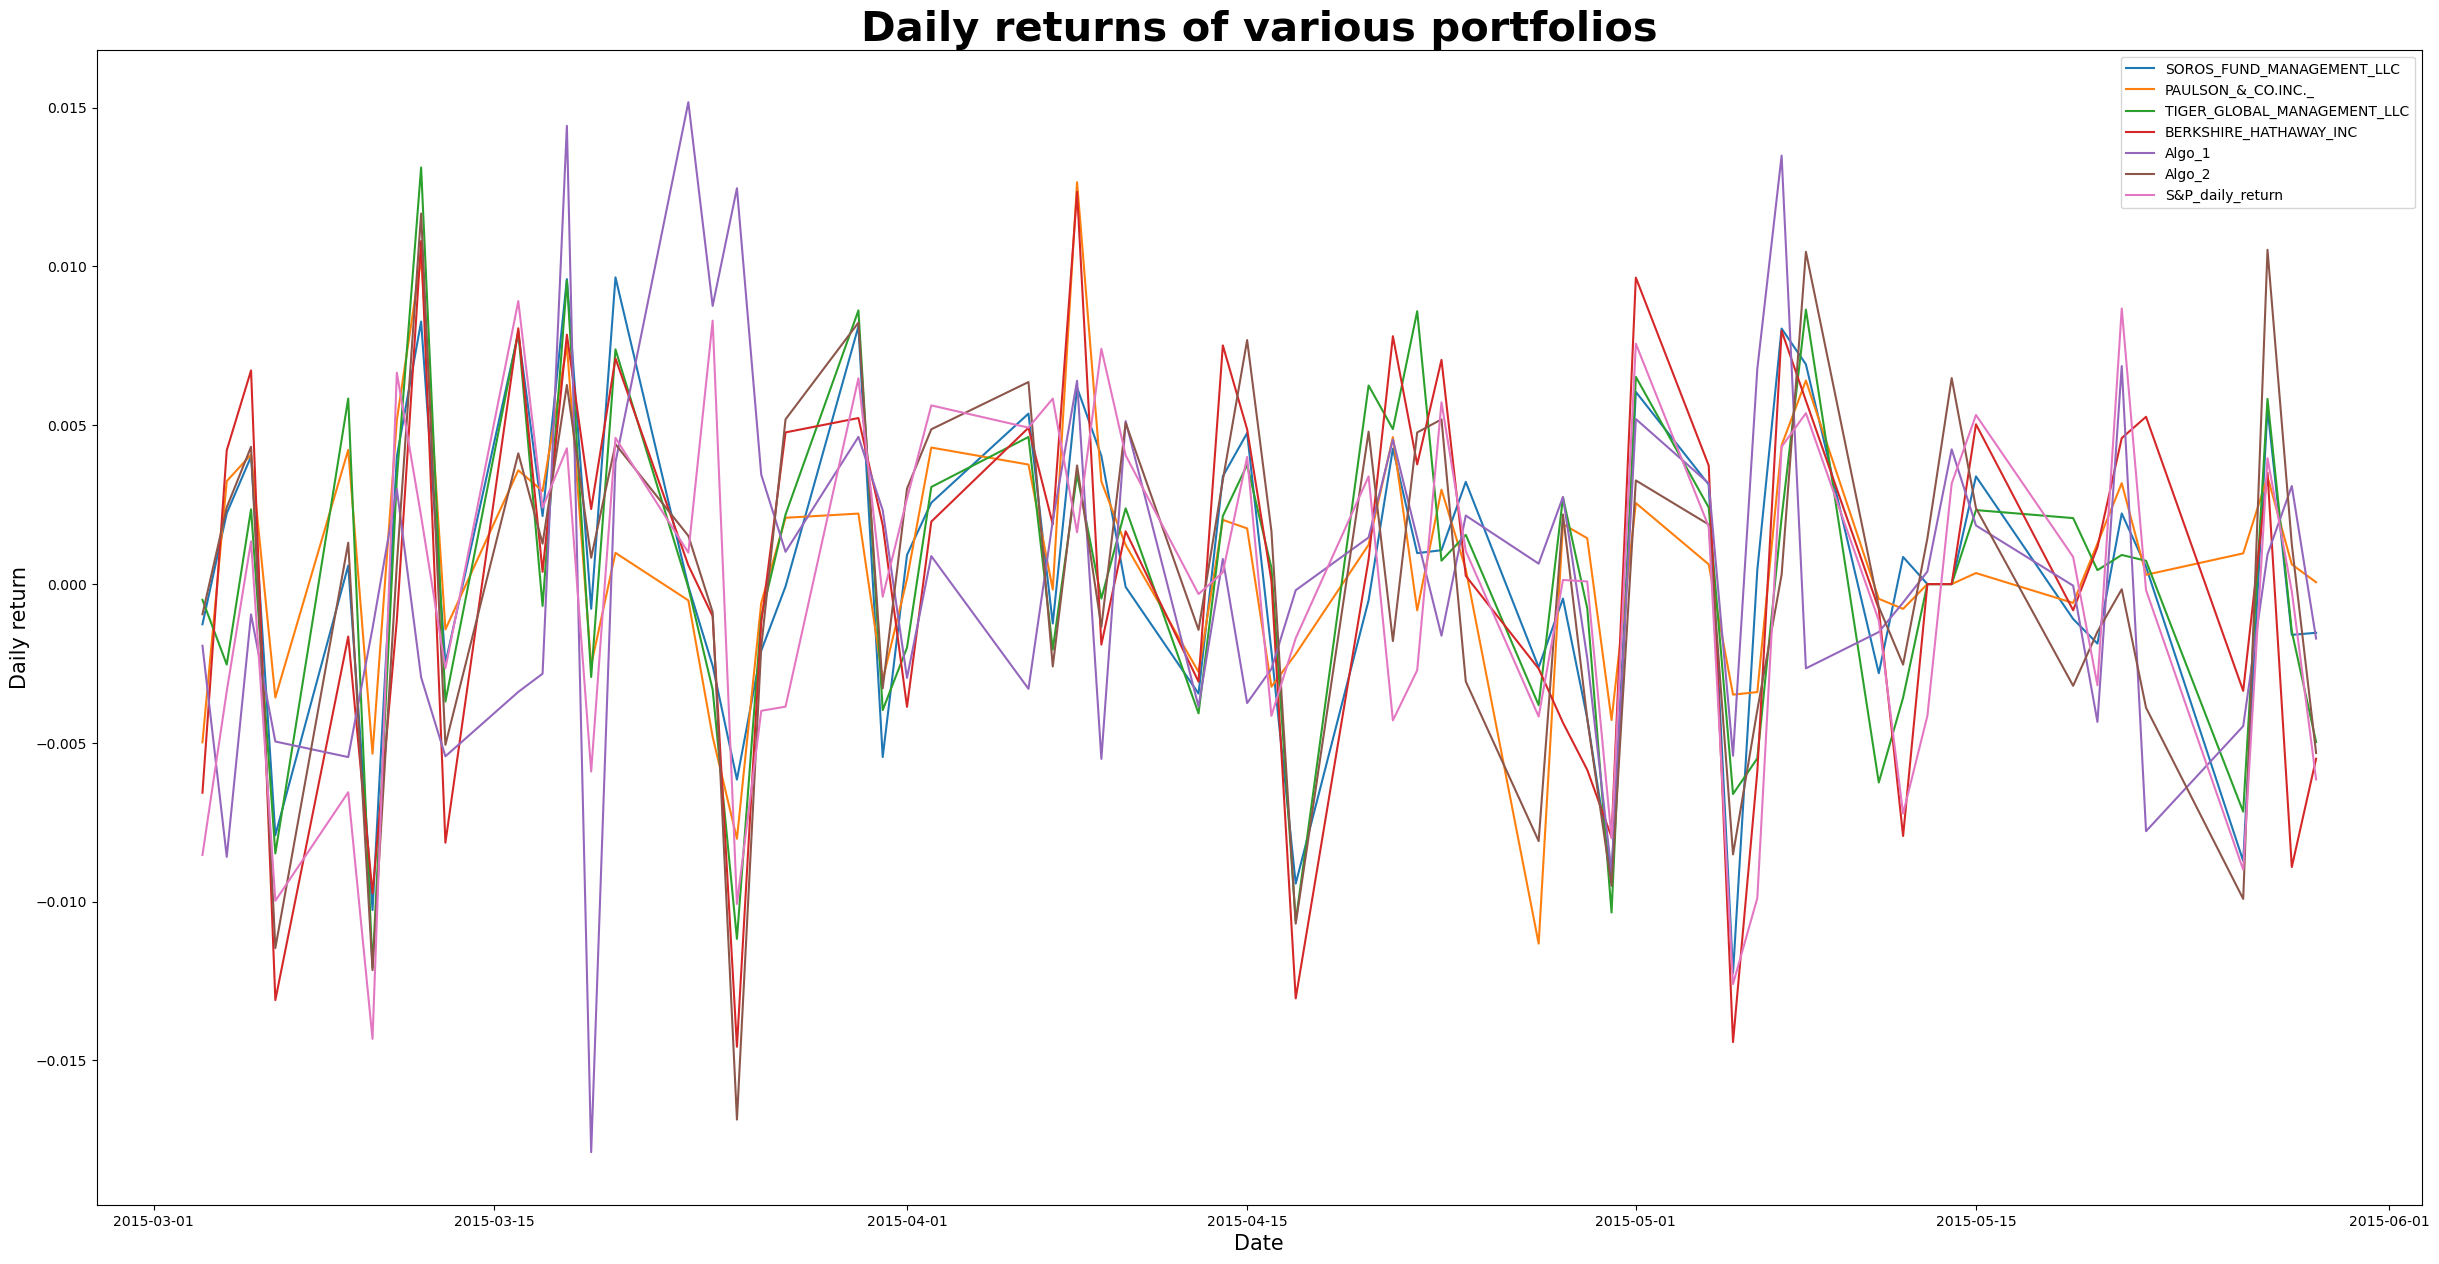

In [202]:
graph_maker(combined_df, '2015-03-03', '2015-05-31')

In [48]:
# def cumsum_graph_maker(df, start_date = '2015-03-03', end_date = '2019-05-01'):
#     lst = list(df.columns)
#     plt.figure(figsize = [25,20])
#     for i in lst:
#         plt.plot(df[i][start_date:end_date].cumsum())
#     plt.legend(labels = lst)



In [ ]:
# cumsum_graph_maker(combined_df, '2015-03-03', '2019-05-31')

#### Calculate and Plot cumulative returns.

In [50]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns


In [88]:
# Created a function called cumprod_graph_maker which will plot cumulative daily return using the date parameters.       
def cumprod_graph_maker(df, start_date = '2015-03-03', end_date = '2019-05-01'):
    lst = list(df.columns)
    plt.figure(figsize = [30,15])
    for i in lst:
        new_df = df.copy()
        plt.plot(new_df[i][start_date:end_date].add(1).cumprod().sub(1))
    plt.legend(labels = lst)
    plt.title(input('Title of the graph:'), fontdict = {'fontsize': 30, 'fontweight': 'bold'})
    plt.xlabel(input('X label:'), fontdict = {'fontsize': 15})
    plt.ylabel(input('Y label:'), fontdict = {'fontsize': 15})

Title of the graph: Cumulative returns of various portfolios
X label: Date
Y label: Cumulative returns


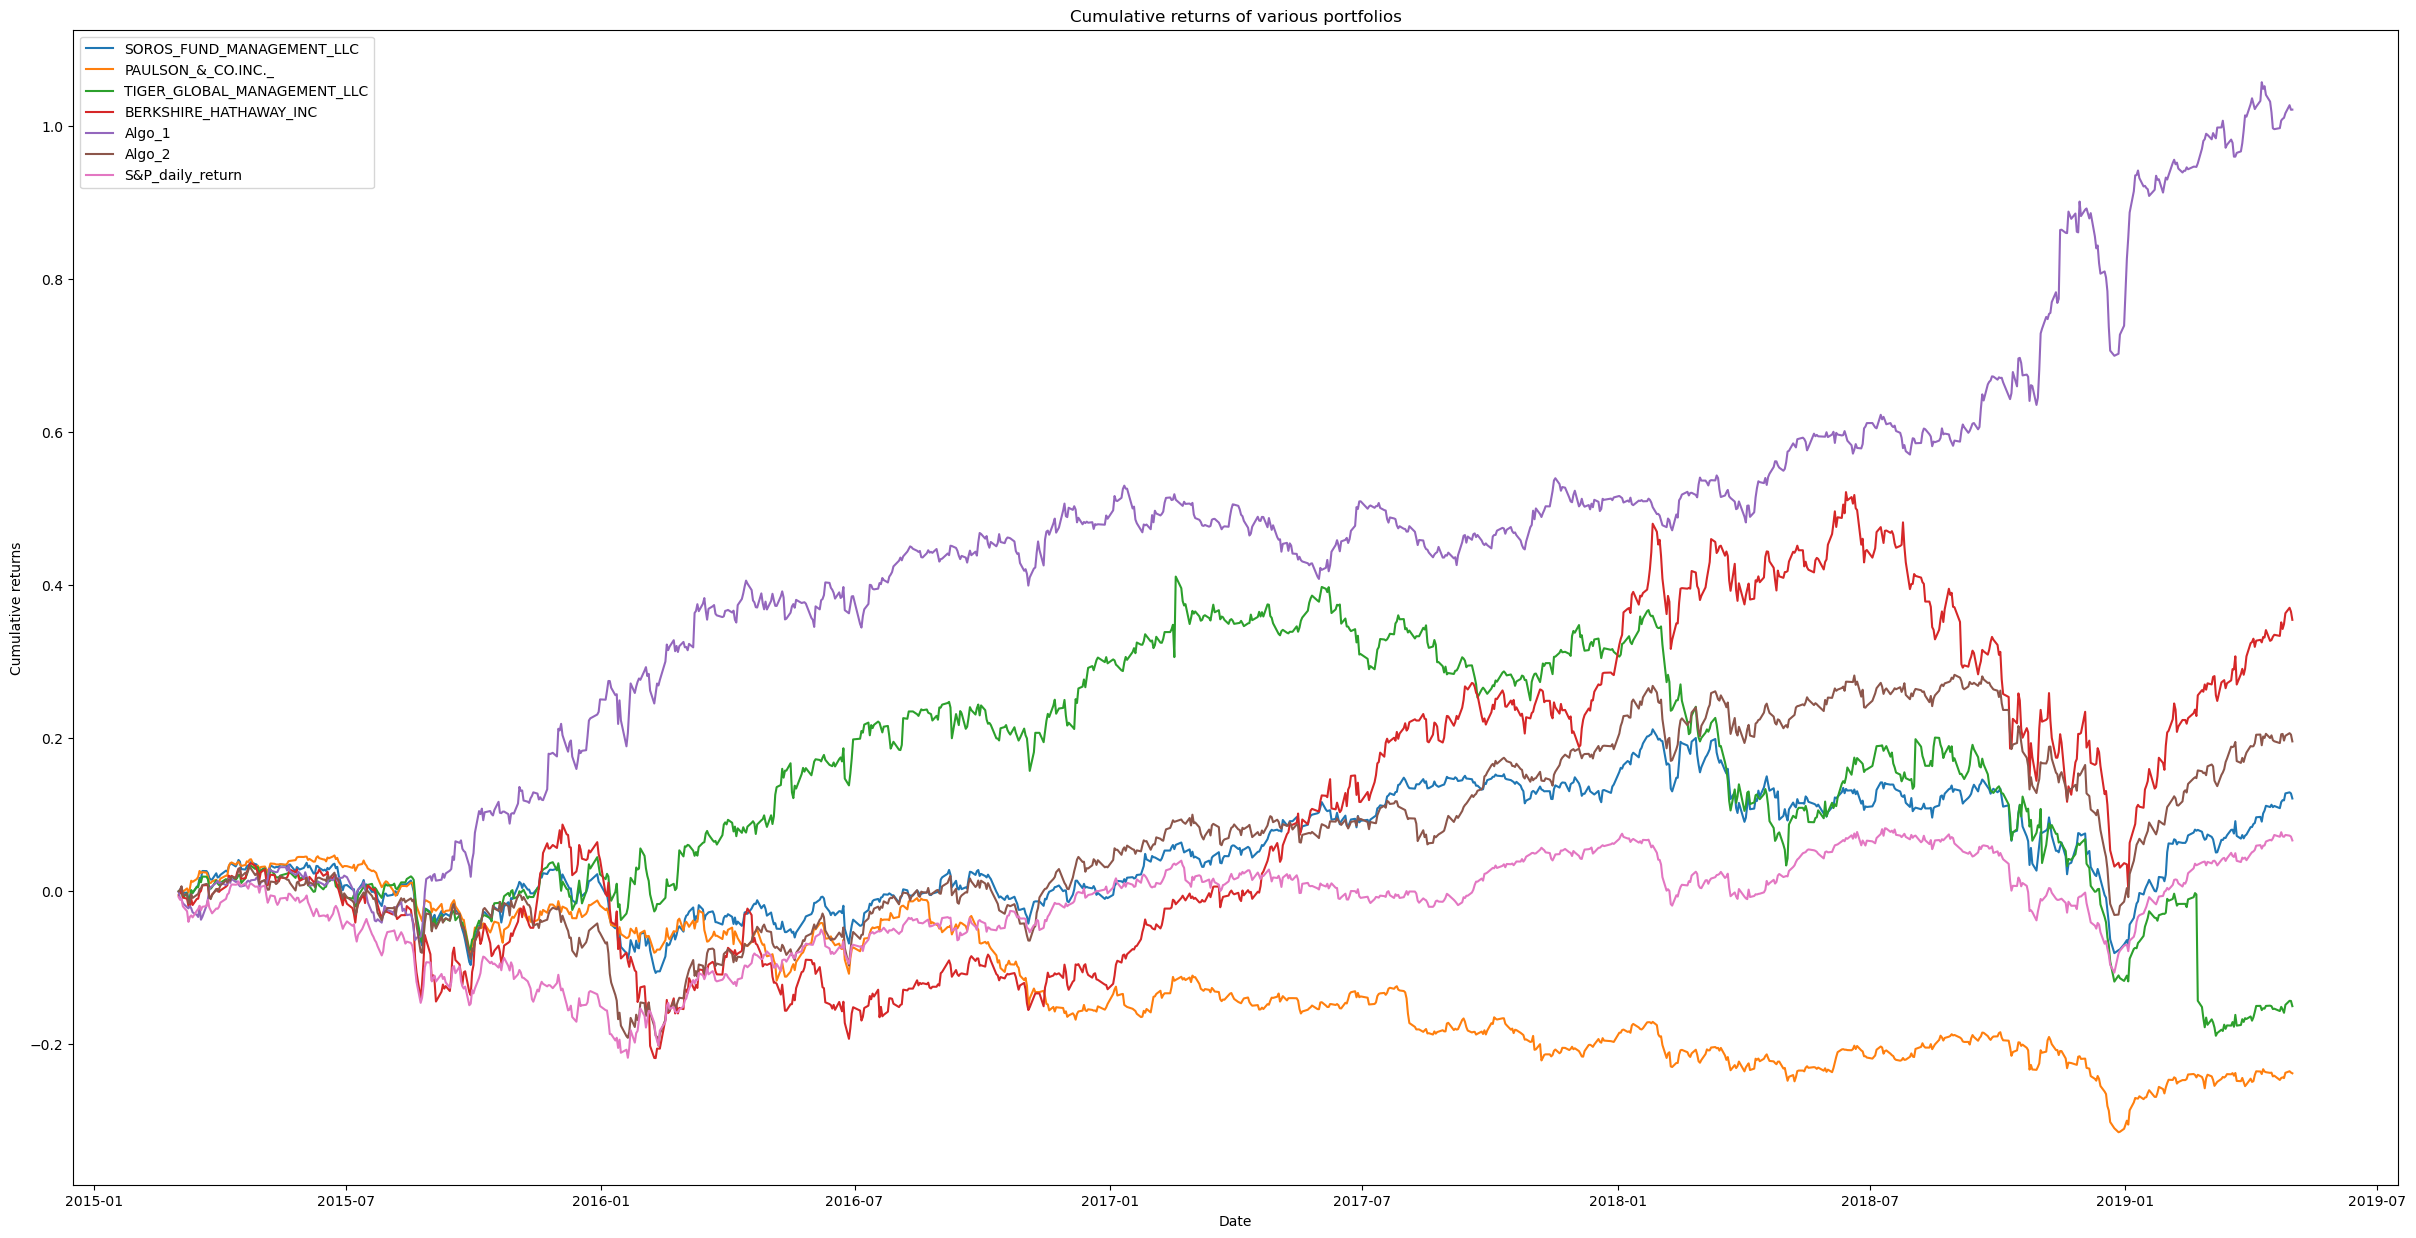

In [89]:
cumprod_graph_maker(combined_df, '2015-03-03', '2019-05-31')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [51]:
# Created a function called boxplot_maker which will plot boxplots for each portfolios
def boxplot_maker(df):
    lst = list(df.columns)
    count = 0
    extra_row = False
    if len(lst) % 3 == 0:
        n_row = len(lst) / 3
    else:
        n_row = (len(lst) // 3) + 1
        extra_row = True
    fig, axs = plt.subplots(nrows = n_row, ncols = 3, figsize = (27, n_row * 2), sharex = True)
    for i in range(n_row):
        for j in range(3):
            axs[i,j].boxplot(df[lst[count]], vert = False)
            axs[i,j].legend(labels = [lst[count]])
            count += 1
            if count == len(lst):
                break
    if extra_row == True:
        for i in range(2,((len(lst) % 3)-1),-1):
            fig.delaxes(axs[2,i])


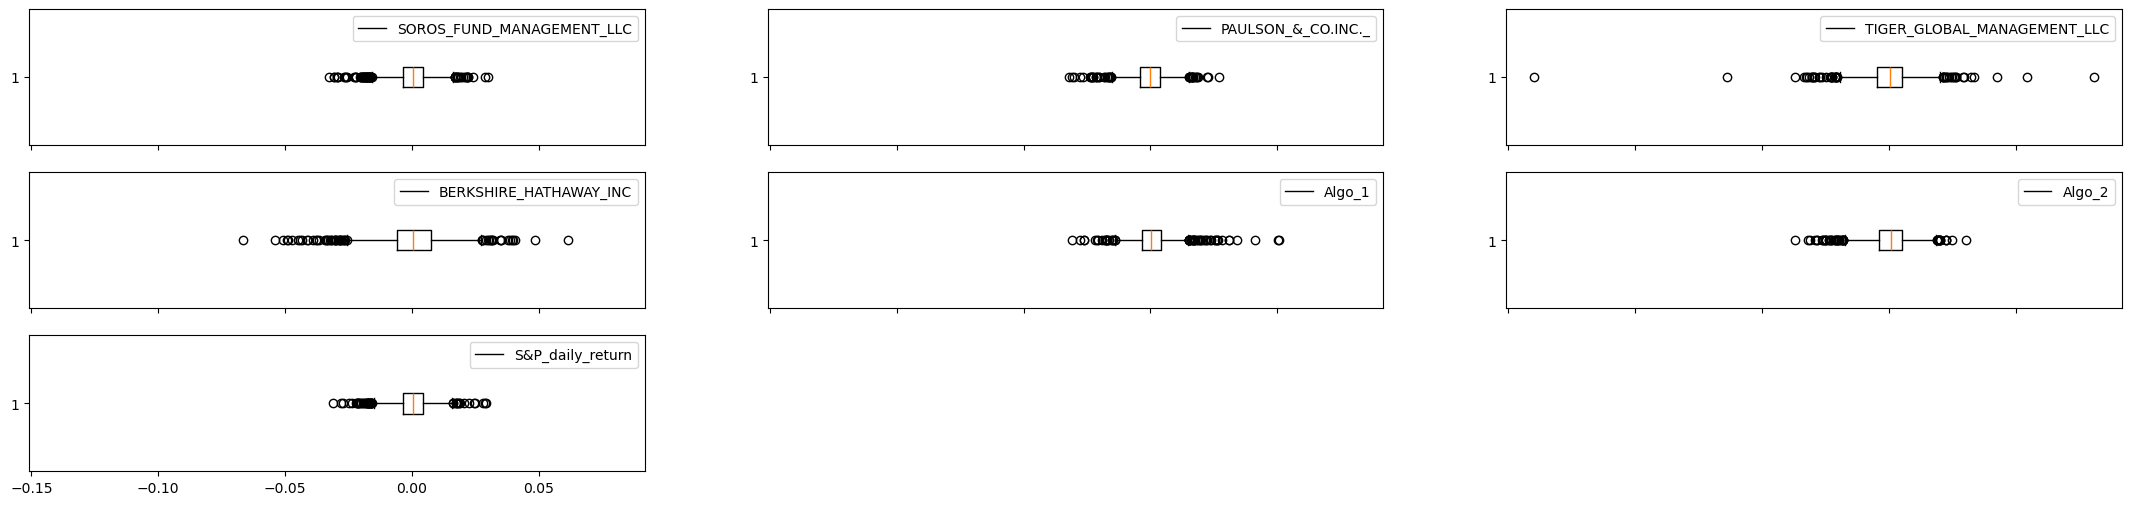

In [52]:
boxplot_maker(combined_df)

In [53]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [90]:
# Created a funciton called stdev_df which will return a dataframe of standard deviations for each portfolios
def stdev_df(df, annualized = False, sort = False):
    dataframe = pd.DataFrame(df.std(), columns = ['St_dev'])
    # If you want annualized standard deviation, set annualized to True and it will return annualized standard deviation
    if annualized == True:
        dataframe = dataframe * np.sqrt(252)
    # If you want to sort the value, set sort to True
    if sort == True:
        dataframe.sort_values(by = ['St_dev'], ascending = False, inplace = True)
    return dataframe

In [91]:
daily_std_df = stdev_df(combined_df, sort = True)
daily_std_df

,St_dev
BERKSHIRE_HATHAWAY_INC,0.012826
TIGER_GLOBAL_MANAGEMENT_LLC,0.010883
Algo_2,0.008326
SOROS_FUND_MANAGEMENT_LLC,0.007828
Algo_1,0.007589
S&P_daily_return,0.007034
PAULSON_&_CO.INC._,0.006982


In [56]:
# Calculate the daily standard deviations of all portfolios


### Determine which portfolios are riskier than the S&P TSX 60

In [92]:
# Show daily standard deviation of S&P TSX 60
snp_daily_stdev = daily_std_df.loc['S&P_daily_return']
snp_daily_stdev

St_dev    0.007034
Name: S&P_daily_return, dtype: float64

#### Determine which portfolios are riskier than the S&P TSX 60
Based on the daily_std_df dataframe, all the given portfolios are riskier than the S&P TSX 60 except for the Paulson % CO. Inc. portfolio


### Calculate the Annualized Standard Deviation

In [94]:
# Showing annualized standard deviation
annualized_std = stdev_df(combined_df, annualized = True, sort = True)
annualized_std

,St_dev
BERKSHIRE_HATHAWAY_INC,0.203599
TIGER_GLOBAL_MANAGEMENT_LLC,0.172759
Algo_2,0.132177
SOROS_FUND_MANAGEMENT_LLC,0.124259
Algo_1,0.120470
S&P_daily_return,0.111664
PAULSON_&_CO.INC._,0.110841


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [95]:
# Created a function called rolling_stdev_df which returns a dataframe of rolling standard deviations. Default rolling window is set to 21 days
def rolling_stdev_df(df, rolling = 21):
    dataframe = df.rolling(rolling).std().dropna()
    return dataframe

In [96]:
rolling_std = rolling_stdev_df(combined_df)
rolling_std

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


Title of the graph: 21 days rolling St Dev. of various portfolios
X label: Date
Y label: Rolling standard deviation


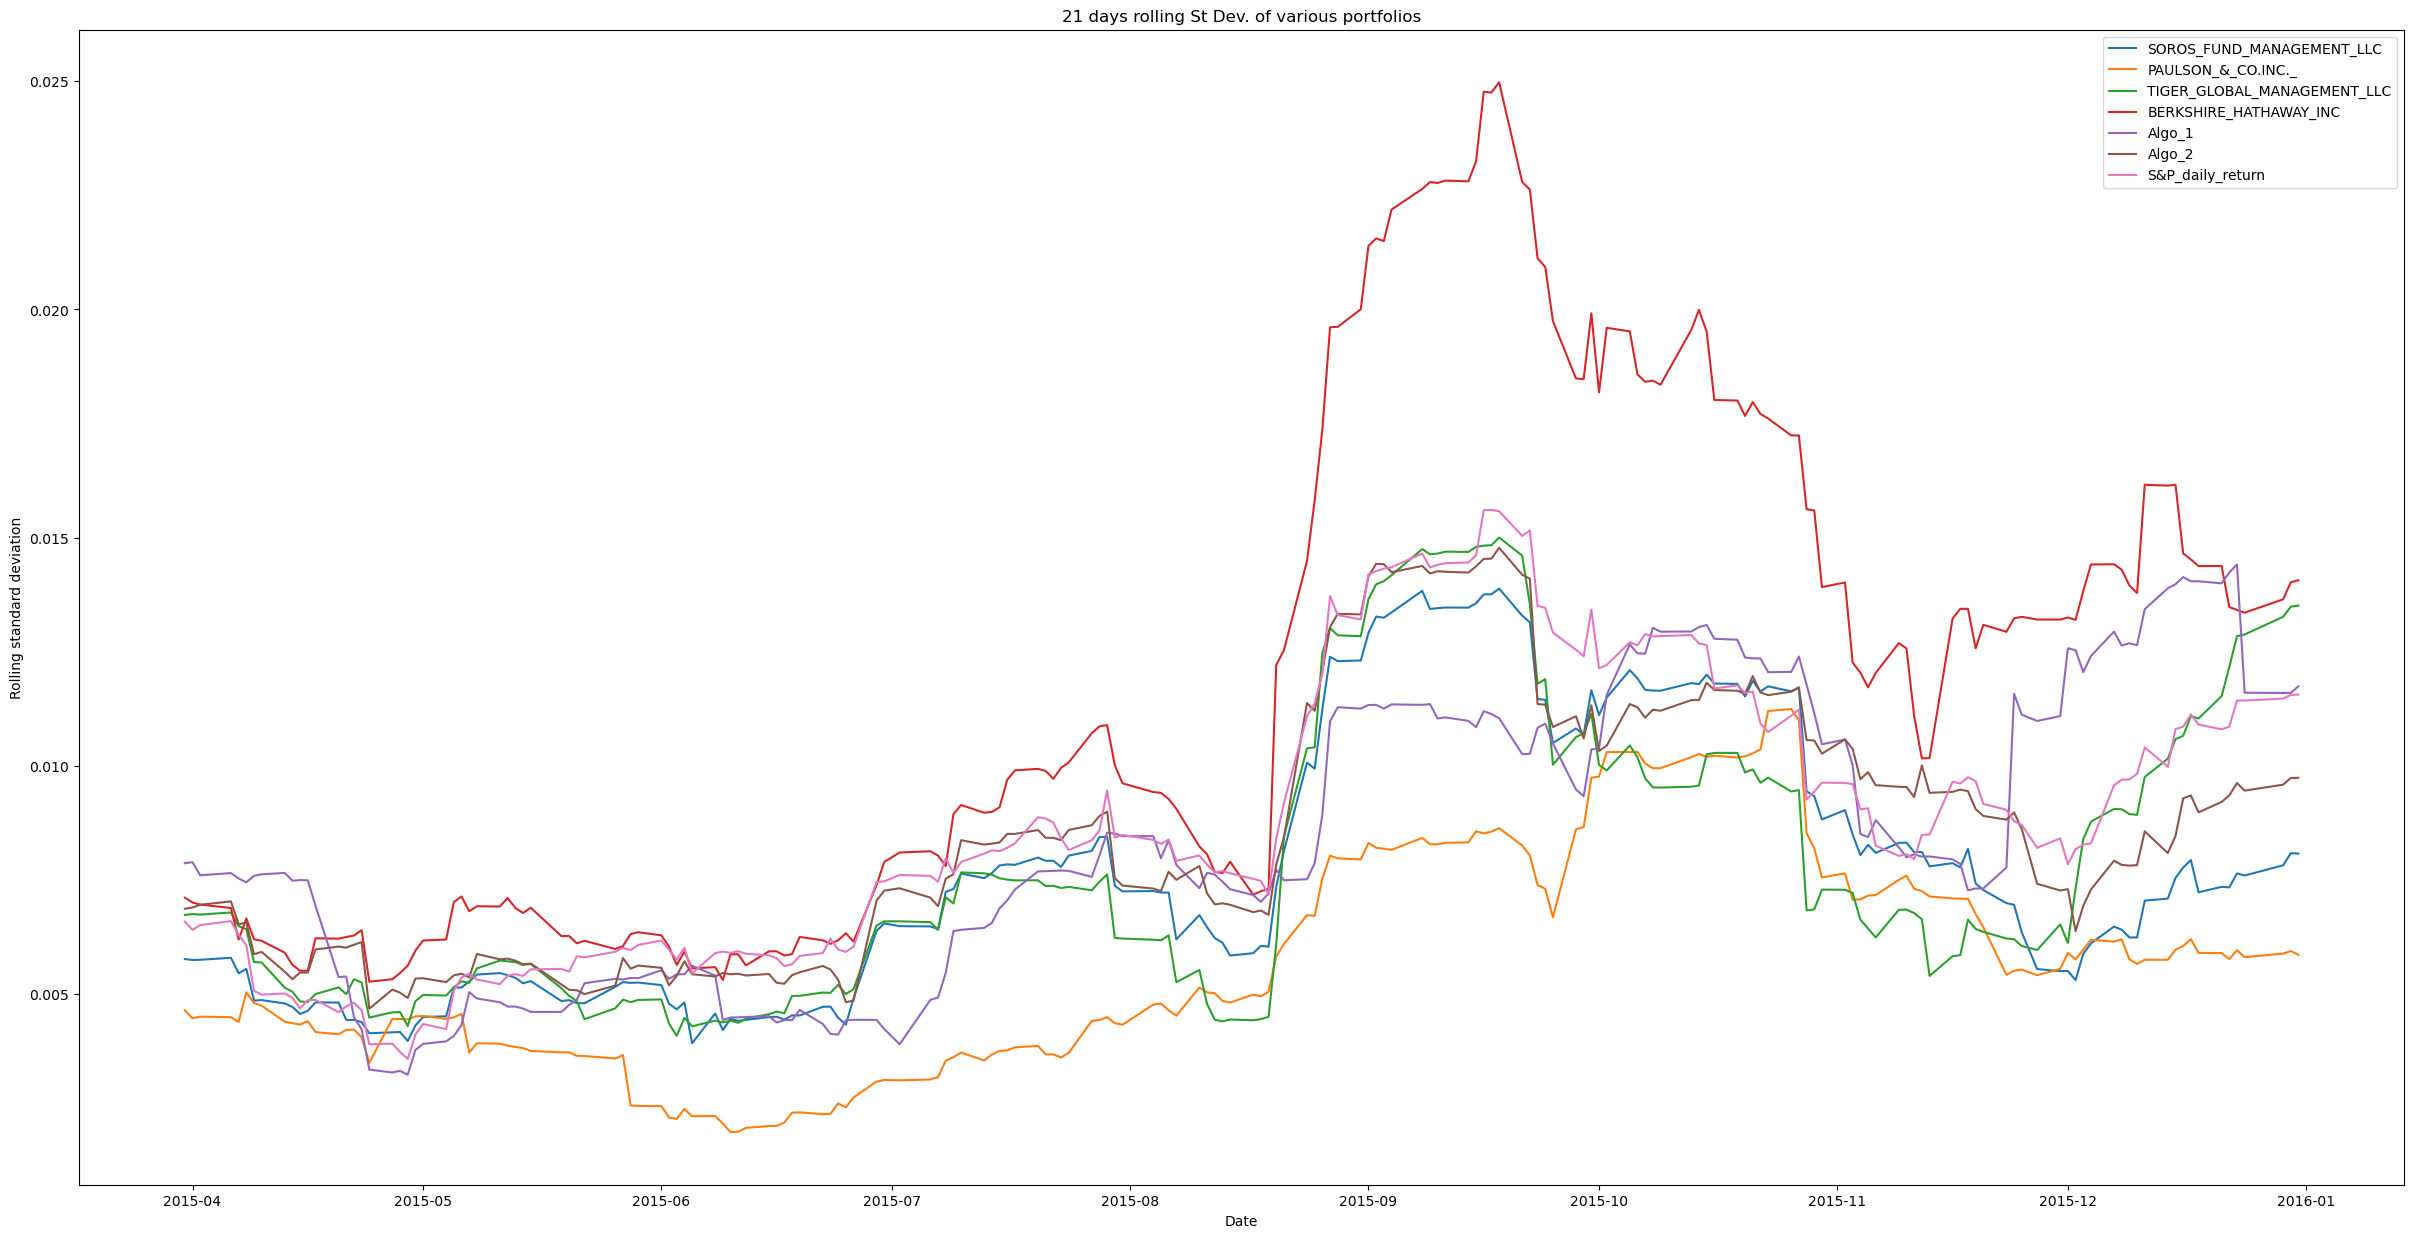

In [97]:
graph_maker(rolling_std, '2015-03-31', '2015-12-31')

### Calculate and plot the correlation

In [98]:
# Created a function called corr_df which returns a correlation information of the portfolios.
def corr_df(df, graph = False):
    dataframe = df.corr()
    # When graph == True, it also shows a correlation matrix 
    if graph == True:
        sns.heatmap(dataframe, annot = True, fmt = '.2f', cmap = 'PiYG', linewidths = .5, square = True, annot_kws = {'fontsize':8, 'fontweight': 'bold'}, vmin = -1, vmax = 1)
    return dataframe

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return
SOROS_FUND_MANAGEMENT_LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON_&_CO.INC._,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER_GLOBAL_MANAGEMENT_LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE_HATHAWAY_INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo_1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo_2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P_daily_return,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


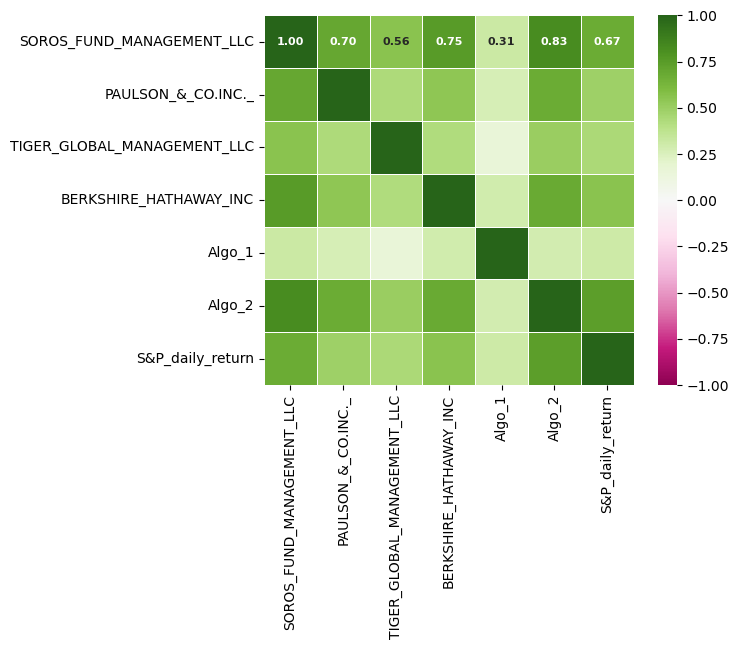

In [99]:
correlation = corr_df(combined_df, graph = True)
correlation

In [100]:
combined_df.cov()

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return
SOROS_FUND_MANAGEMENT_LLC,0.000061,0.000038,0.000048,0.000075,0.000019,0.000054,0.000037
PAULSON_&_CO.INC._,0.000038,0.000049,0.000033,0.000048,0.000014,0.000039,0.000024
TIGER_GLOBAL_MANAGEMENT_LLC,0.000048,0.000033,0.000118,0.000059,0.000013,0.000046,0.000034
BERKSHIRE_HATHAWAY_INC,0.000075,0.000048,0.000059,0.000164,0.000028,0.000073,0.000050
Algo_1,0.000019,0.000014,0.000013,0.000028,0.000058,0.000018,0.000017
Algo_2,0.000054,0.000039,0.000046,0.000073,0.000018,0.000069,0.000043
S&P_daily_return,0.000037,0.000024,0.000034,0.000050,0.000017,0.000043,0.000049


In [67]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [68]:
## Beta = covariance btwn portfolio and index / variance of index

In [106]:
def covar_df(df, comparing_security = 'S&P_daily_return'):
    dataframe = df.cov()[[comparing_security]].rename(columns = {comparing_security: f'Covariance_with_{comparing_security}'})
    return dataframe

def var_df(df):
    dataframe = pd.DataFrame(df.var(), columns = ['Variance'])
    return dataframe

In [70]:
covariance_df = covar_df(combined)
covariance_df

,Covariance_with_S&P_daily_return
SOROS_FUND_MANAGEMENT_LLC,0.000037
PAULSON_&_CO.INC._,0.000024
TIGER_GLOBAL_MANAGEMENT_LLC,0.000034
BERKSHIRE_HATHAWAY_INC,0.000050
Algo_1,0.000017
Algo_2,0.000043
S&P_daily_return,0.000049


In [115]:
# Calculating variance of S&P TSX 60
variance_df = var_df(combined_df)
variance_df.loc['S&P_daily_return']

Variance    0.000049
Name: S&P_daily_return, dtype: float64

In [ ]:
covariance_df

In [129]:
def beta_df(df, graph = False, sort = False):
    covariance = covar_df(df)
    variance = var_df(df)
    col_name = covariance.columns[0]
    dataframe = pd.DataFrame(covariance / variance.loc['S&P_daily_return', 'Variance']).drop(['S&P_daily_return']).rename(columns = {col_name: 'Beta'})
    if sort == True:
        dataframe.sort_values(by = ['Beta'], ascending = False, inplace = True)
    if graph == True:
        dataframe.plot.bar()
    return dataframe

,Beta
BERKSHIRE_HATHAWAY_INC,1.016044
Algo_2,0.872827
SOROS_FUND_MANAGEMENT_LLC,0.749945
TIGER_GLOBAL_MANAGEMENT_LLC,0.681640
PAULSON_&_CO.INC._,0.482925
Algo_1,0.334745


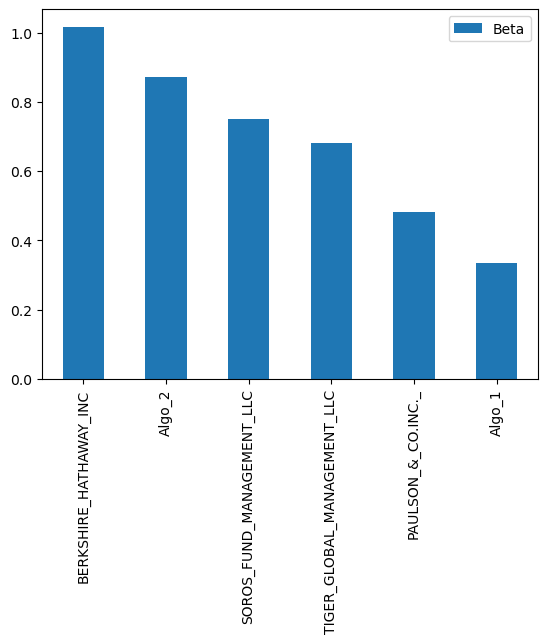

In [130]:
beta = beta_df(combined_df, graph = True, sort = True)
beta

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [177]:
combined.ewm(halflife = 21, min_periods = 21).std().dropna()

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return
Date,,,,,,,
2015-03-31,0.005767,0.004564,0.006689,0.006958,0.007978,0.006920,0.006464
2015-04-01,0.005577,0.004414,0.006498,0.006810,0.007788,0.006732,0.006310
2015-04-02,0.005415,0.004381,0.006326,0.006608,0.007540,0.006615,0.006294
2015-04-06,0.005356,0.004314,0.006210,0.006504,0.007381,0.006564,0.006223
2015-04-07,0.005227,0.004190,0.006060,0.006317,0.007165,0.006419,0.006188
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


In [76]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [189]:
def sharpe_ratio_df(df, graph = False, sort = False):
    dataframe = pd.DataFrame(((df.mean().iloc[:] - df['S&P_daily_return'].mean()) * 252) / (df.std().iloc[:] * np.sqrt(252)), columns = ['sharpe_ratio'])
    dataframe.drop(['S&P_daily_return'], inplace = True)
    if sort == True:
        dataframe.sort_values(by = ['sharpe_ratio'], ascending = False, inplace = True)
    if graph == True:
        dataframe.plot.bar()
    return dataframe

,sharpe_ratio
Algo_1,1.310258
BERKSHIRE_HATHAWAY_INC,0.359795
Algo_2,0.231615
SOROS_FUND_MANAGEMENT_LLC,0.110980
TIGER_GLOBAL_MANAGEMENT_LLC,-0.270851
PAULSON_&_CO.INC._,-0.744596


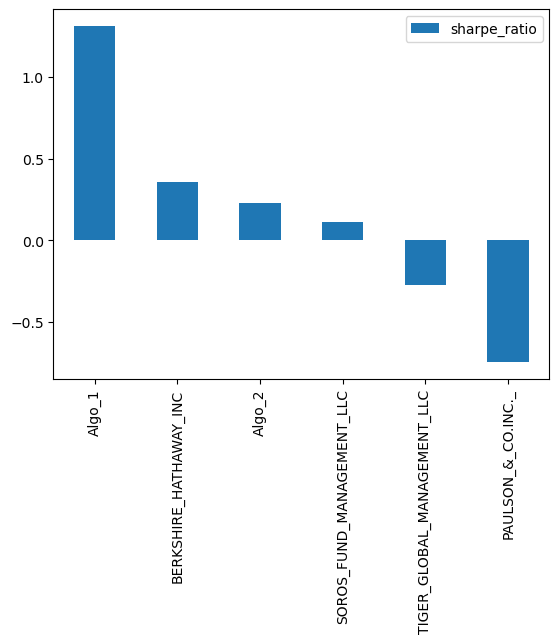

In [191]:
sharpe_ratio = sharpe_ratio_df(combined_df, True, True)
sharpe_ratio

In [79]:
# Annualized Sharpe Ratios


In [80]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [171]:
tickers = ['AAPL', 'ADBE', 'MSFT', 'NFLX', 'NKE']

def dataframe_gatherer(ticker_list):
    df_list = []
    for i in ticker_list:
        df = pd.read_csv(f'Resources/{i}.csv')
        df.set_index(pd.to_datetime(df['Date']).dt.date, inplace = True)
        df.drop('Date', axis = 1, inplace = True)
        df.rename(columns = {'Close': f'{i}'}, inplace = True)
        df_list.append(df)
    dataframe = pd.concat(df_list, axis = 'columns', join = 'inner')
    return dataframe

In [172]:
my_portfolio = dataframe_gatherer(tickers)

In [173]:
my_portfolio = my_portfolio.pct_change().dropna()

In [174]:
my_portfolio.head(5)

,AAPL,ADBE,MSFT,NFLX,NKE
Date,,,,,
2017-01-04,-0.001033,0.006378,-0.004474,0.015060,0.020970
2017-01-05,0.004826,0.016996,0.000000,0.018546,-0.000188
2017-01-06,0.011321,0.022566,0.008668,-0.005614,0.016020
2017-01-09,0.009159,0.002493,-0.003183,-0.000916,-0.009831
2017-01-10,0.001008,-0.002855,-0.000319,-0.008095,-0.005058


In [175]:
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
my_portfolio_return = pd.DataFrame(my_portfolio.dot(weights), columns = ['My_return'])
my_portfolio_return

,My_return
Date,
2017-01-04,0.007380
2017-01-05,0.008036
2017-01-06,0.010592
2017-01-09,-0.000456
2017-01-10,-0.003064
...,...
2019-04-25,0.001382
2019-04-26,0.008561
2019-04-29,0.001330


In [176]:
all_combined = pd.merge(left = combined_df, right = my_portfolio_return, how = 'inner', left_index = True, right_index = True)

In [177]:
all_combined.head()

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return,My_return
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.007383,0.007380
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,0.004500,0.008036
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,-0.005808,0.010592
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.006911,-0.000456
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.002426,-0.003064


Title of the graph: Cumulative return of various portfolios
X label: Date
Y label: Cumulative return


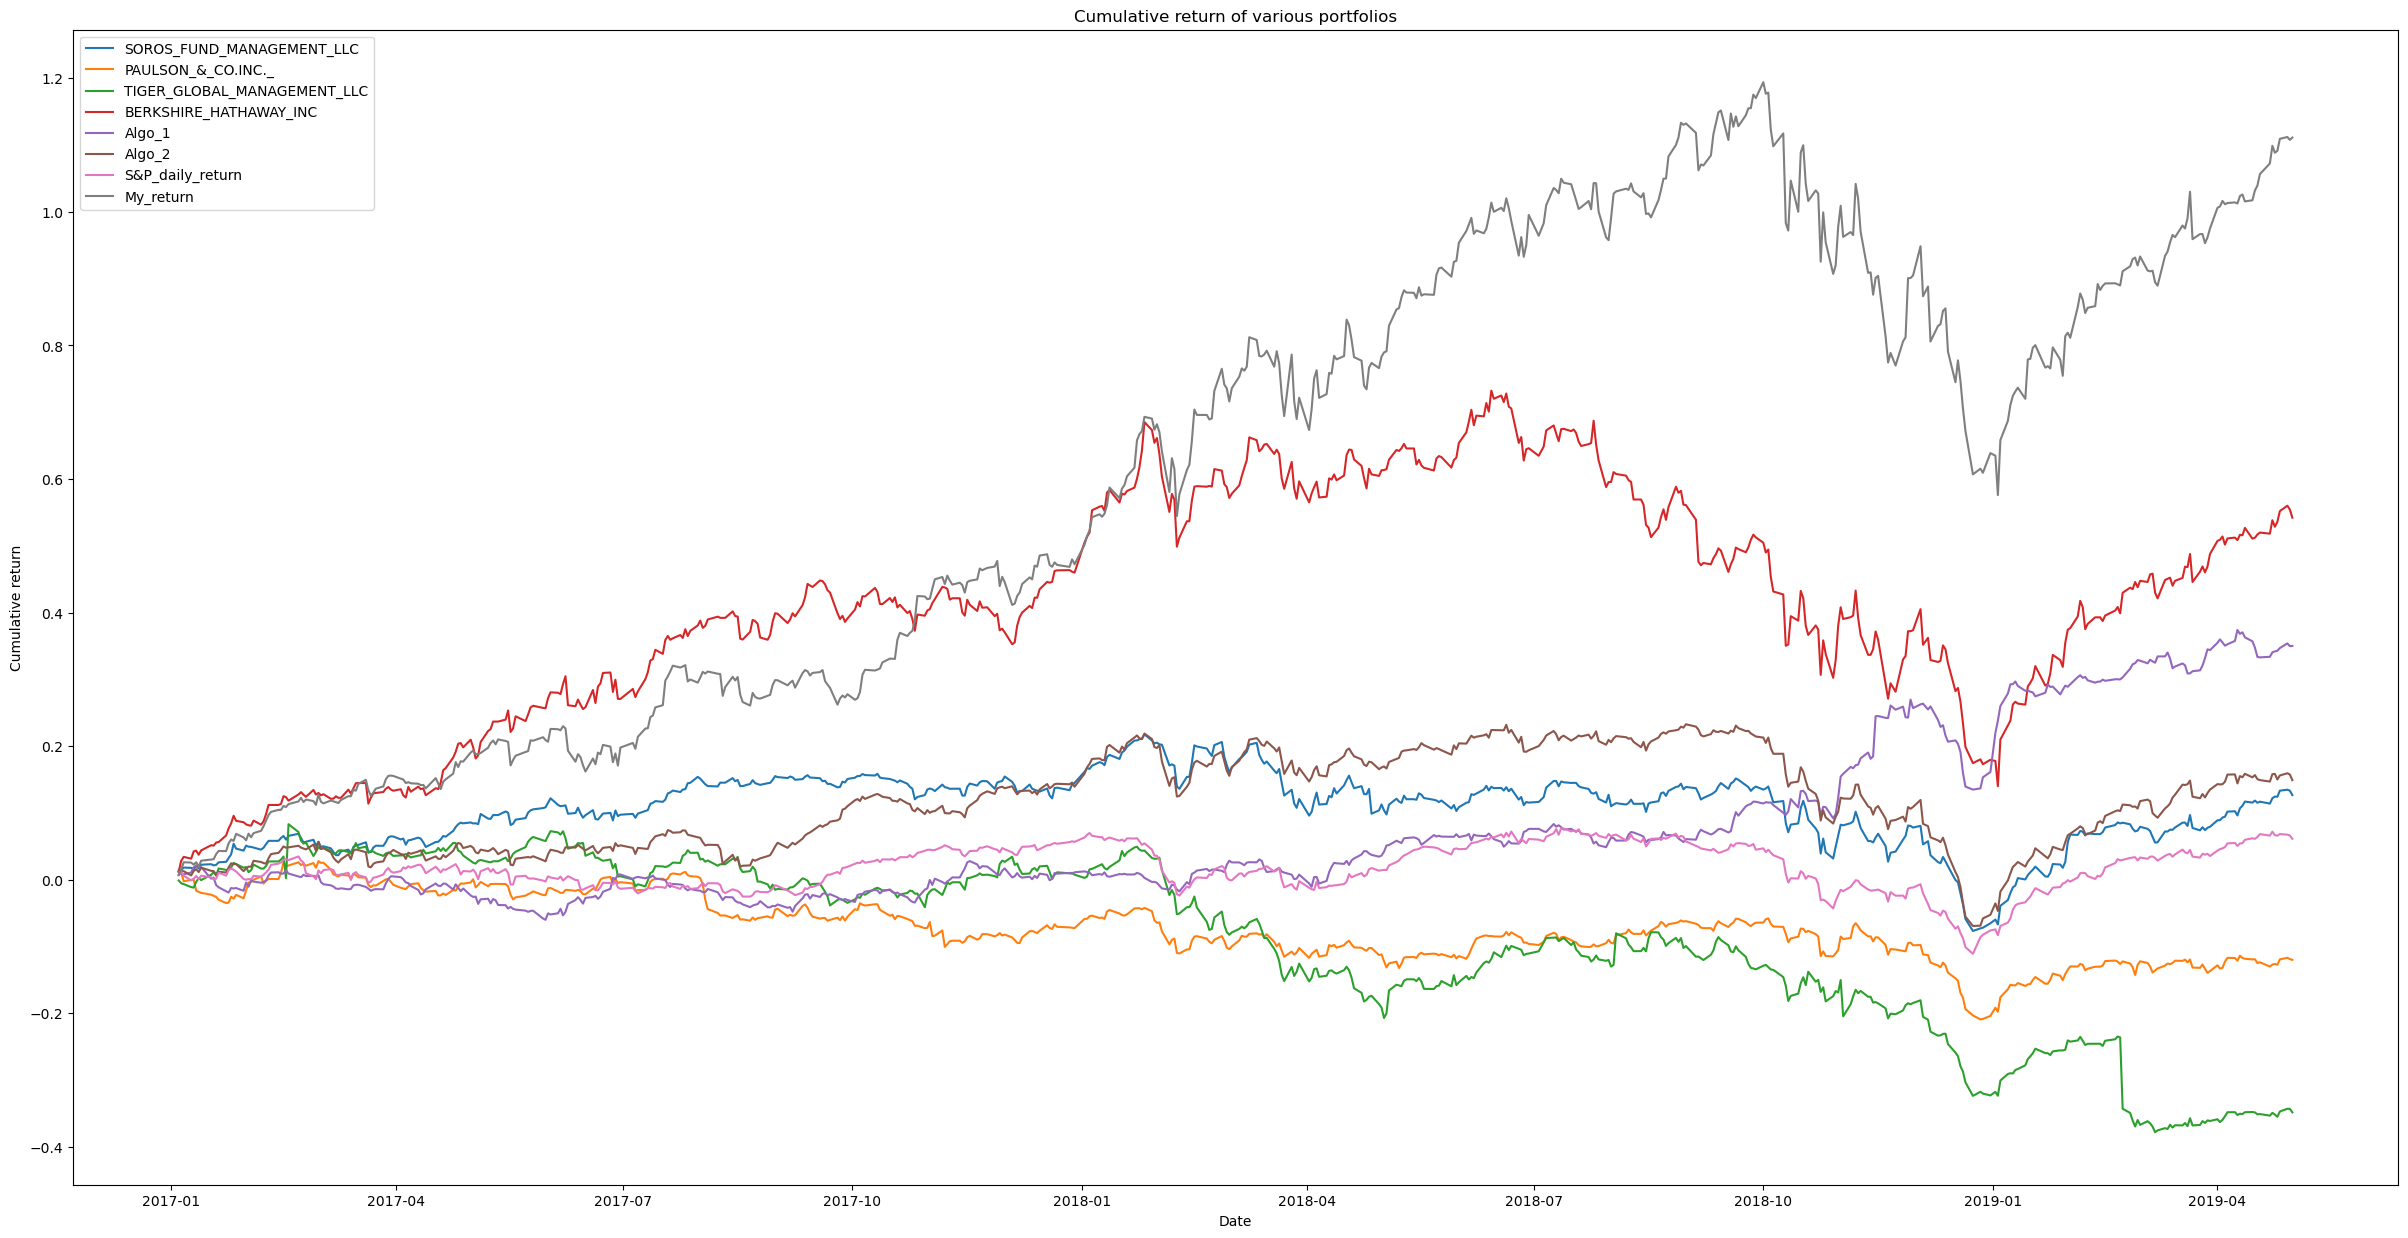

In [178]:
cumprod_graph_maker(all_combined, '2017-01-04', '2019-05-01')

In [181]:
# Calculating annualized daily return of all the portfolios including my portfolio
all_std = stdev_df(all_combined, annualized = True)
all_std

,St_dev
SOROS_FUND_MANAGEMENT_LLC,0.121924
PAULSON_&_CO.INC._,0.106148
TIGER_GLOBAL_MANAGEMENT_LLC,0.187323
BERKSHIRE_HATHAWAY_INC,0.194911
Algo_1,0.105662
Algo_2,0.118886
S&P_daily_return,0.088954
My_return,0.209572


In [183]:
# Calculating 21 days rolling standard deviation of all the portfolios including my portfolio
rolling_std = rolling_stdev_df(all_combined)
rolling_std

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return,My_return
Date,,,,,,,,
2017-02-02,0.005154,0.007176,0.005114,0.006422,0.007369,0.005702,0.005248,0.005851
2017-02-03,0.004736,0.007045,0.005361,0.006176,0.006800,0.005099,0.005106,0.005803
2017-02-06,0.004832,0.007070,0.005446,0.005762,0.006764,0.005096,0.005003,0.005684
2017-02-07,0.004818,0.006852,0.005429,0.005739,0.006777,0.005119,0.004880,0.005462
2017-02-08,0.004864,0.006909,0.005300,0.005835,0.006761,0.004887,0.004661,0.005531
...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.005704
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.005353
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.005374


Title of the graph: 21 days rolling standard deviation of various portfolios
X label: Date
Y label: Rolling standard deviation


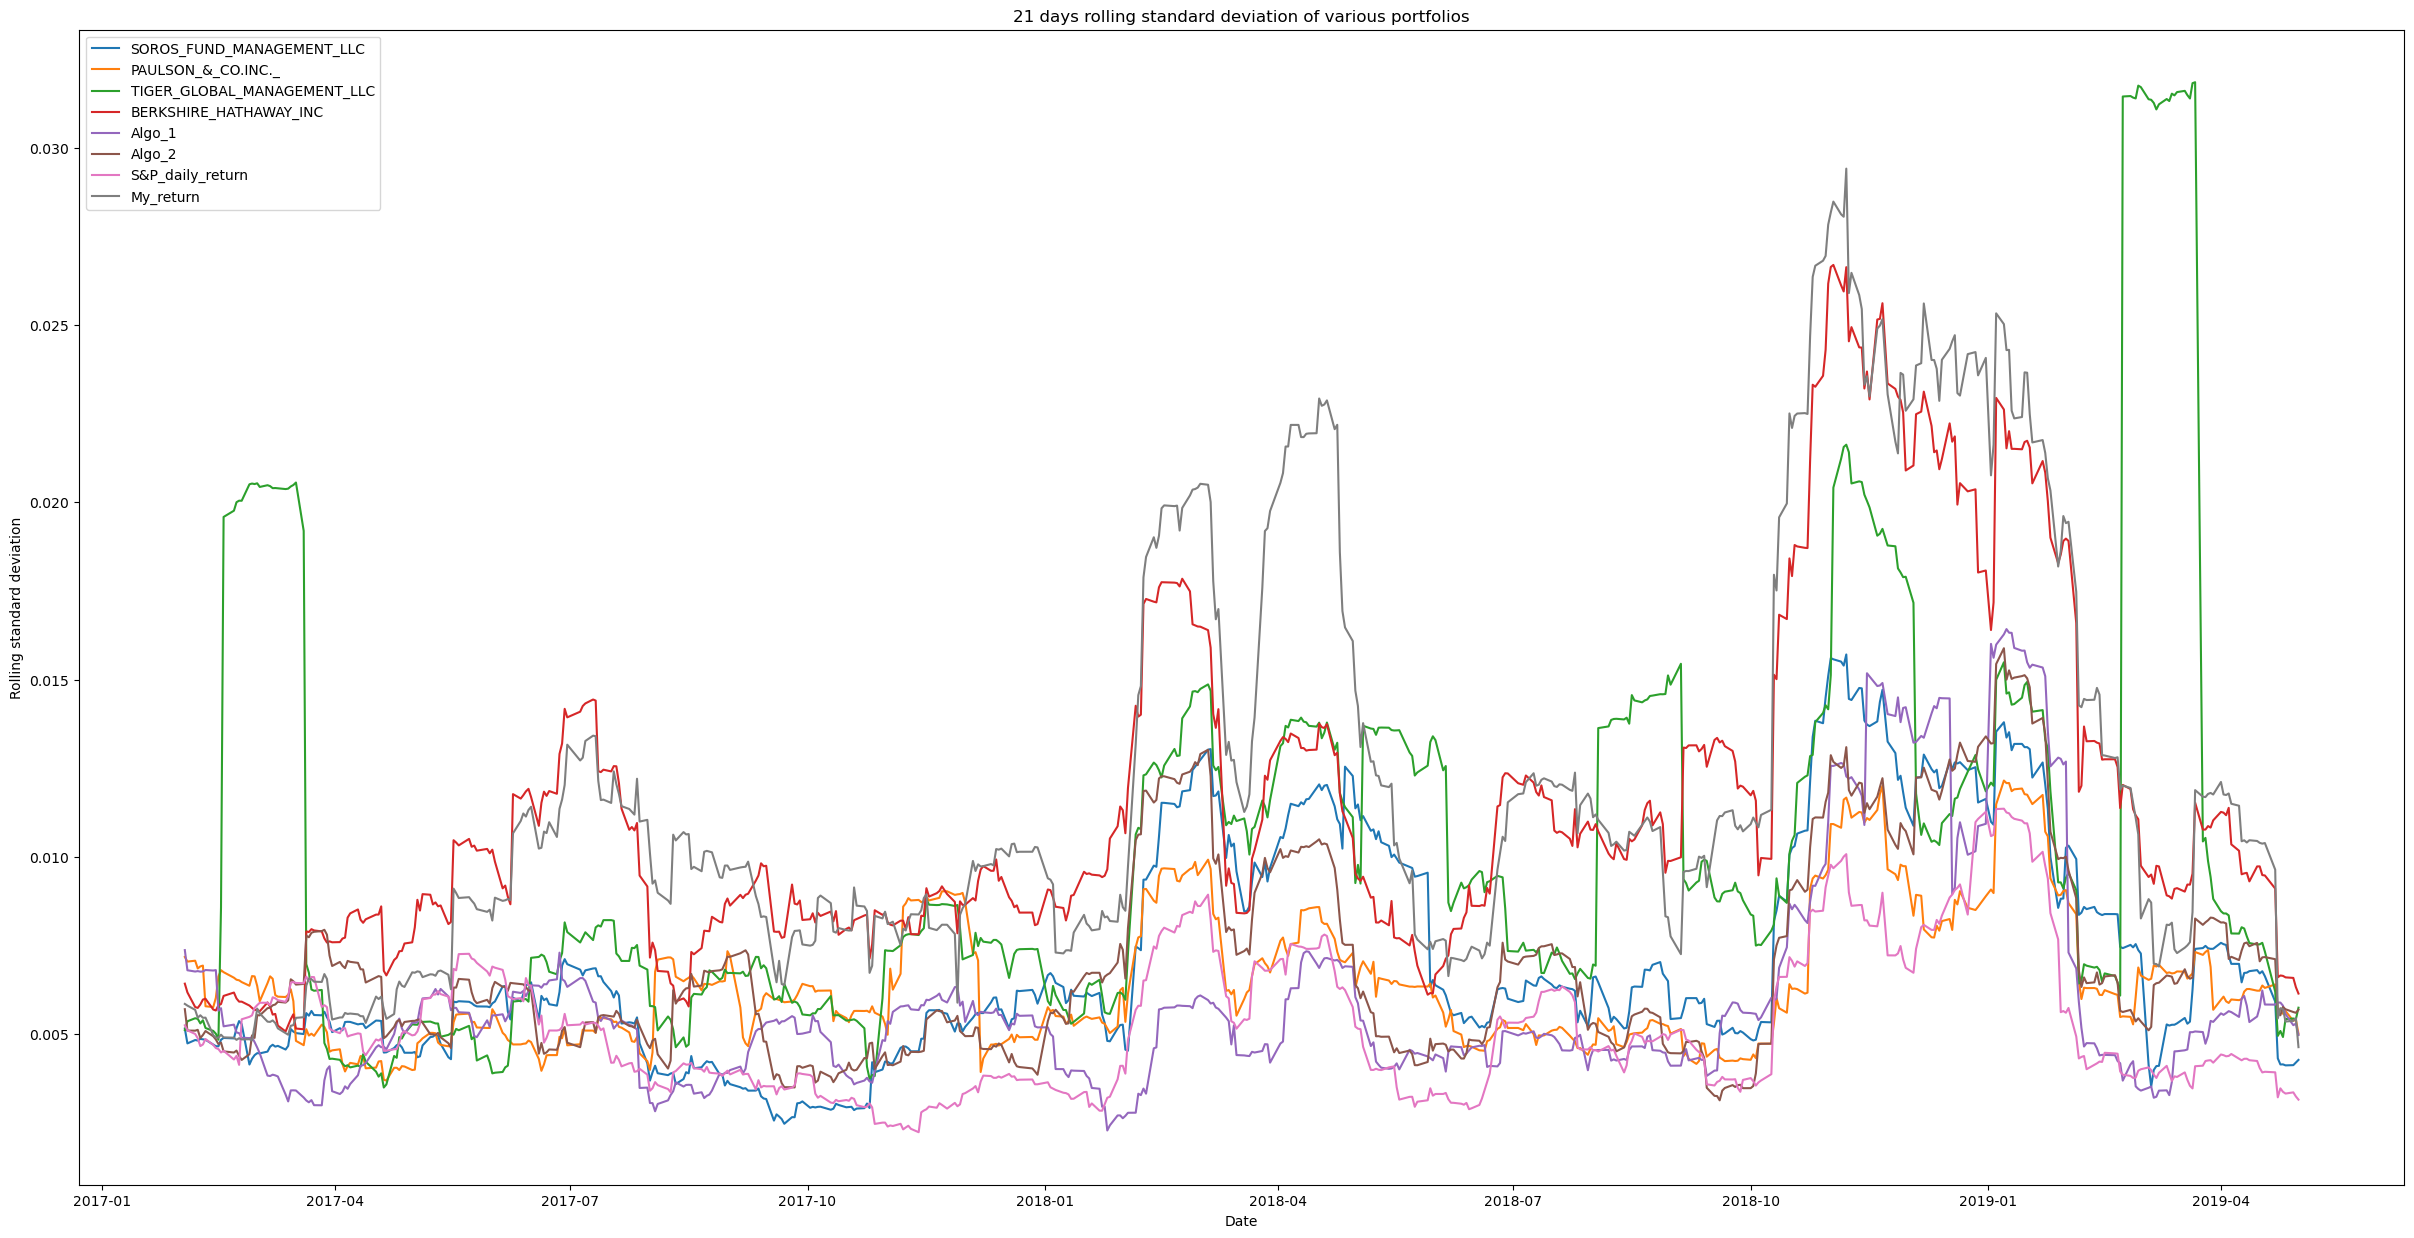

In [184]:
graph_maker(rolling_std, '2017-02-02', '2019-05-01')

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return,My_return
SOROS_FUND_MANAGEMENT_LLC,1.000000,0.676258,0.481812,0.750479,0.258004,0.793306,0.629754,0.689955
PAULSON_&_CO.INC._,0.676258,1.000000,0.417147,0.554358,0.268970,0.711971,0.526272,0.531054
TIGER_GLOBAL_MANAGEMENT_LLC,0.481812,0.417147,1.000000,0.337848,0.079575,0.427083,0.354124,0.387078
BERKSHIRE_HATHAWAY_INC,0.750479,0.554358,0.337848,1.000000,0.222786,0.730203,0.588969,0.817339
Algo_1,0.258004,0.268970,0.079575,0.222786,1.000000,0.284497,0.260889,0.216079
Algo_2,0.793306,0.711971,0.427083,0.730203,0.284497,1.000000,0.713695,0.718190
S&P_daily_return,0.629754,0.526272,0.354124,0.588969,0.260889,0.713695,1.000000,0.568801
My_return,0.689955,0.531054,0.387078,0.817339,0.216079,0.718190,0.568801,1.000000


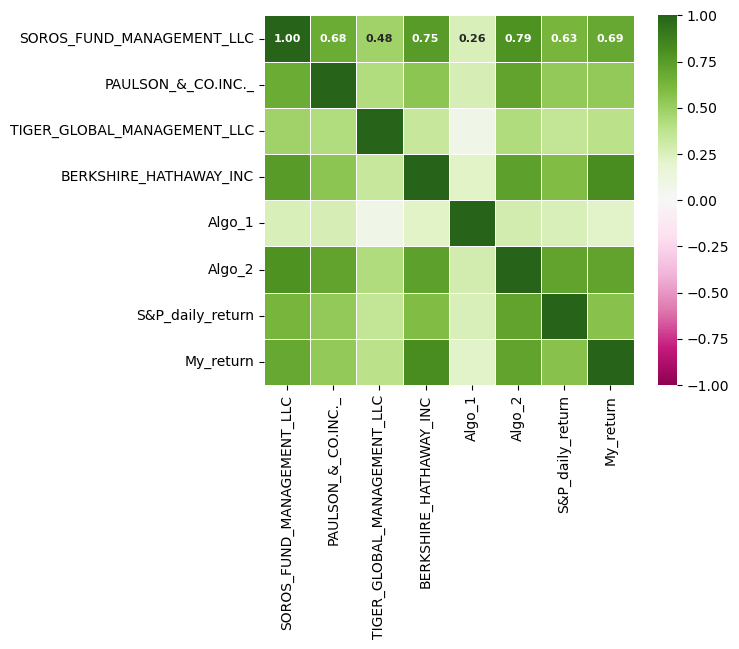

In [185]:
all_corr = corr_df(all_combined, True)
all_corr

In [186]:
all_combined.head(5)

,SOROS_FUND_MANAGEMENT_LLC,PAULSON_&_CO.INC._,TIGER_GLOBAL_MANAGEMENT_LLC,BERKSHIRE_HATHAWAY_INC,Algo_1,Algo_2,S&P_daily_return,My_return
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.007383,0.007380
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,0.004500,0.008036
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,-0.005808,0.010592
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.006911,-0.000456
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.002426,-0.003064


,Beta
My_return,1.340074
BERKSHIRE_HATHAWAY_INC,1.290514
Algo_2,0.953845
SOROS_FUND_MANAGEMENT_LLC,0.863171
TIGER_GLOBAL_MANAGEMENT_LLC,0.745730
PAULSON_&_CO.INC._,0.627995
Algo_1,0.309892


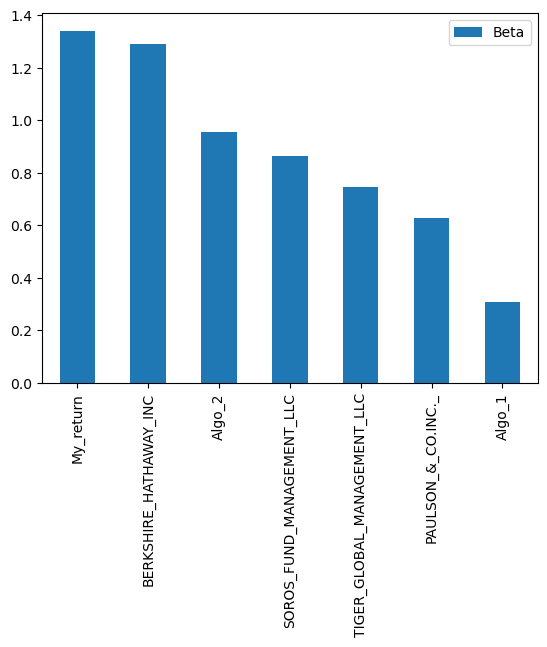

In [187]:
all_covar = covar_df(all_combined)
all_var = var_df(all_combined)
all_beta = beta_df(all_combined, True, True)
all_beta

,sharpe_ratio
My_return,1.527920
Algo_1,1.015109
BERKSHIRE_HATHAWAY_INC,0.919398
Algo_2,0.319897
SOROS_FUND_MANAGEMENT_LLC,0.244145
PAULSON_&_CO.INC._,-0.758616
TIGER_GLOBAL_MANAGEMENT_LLC,-1.067832


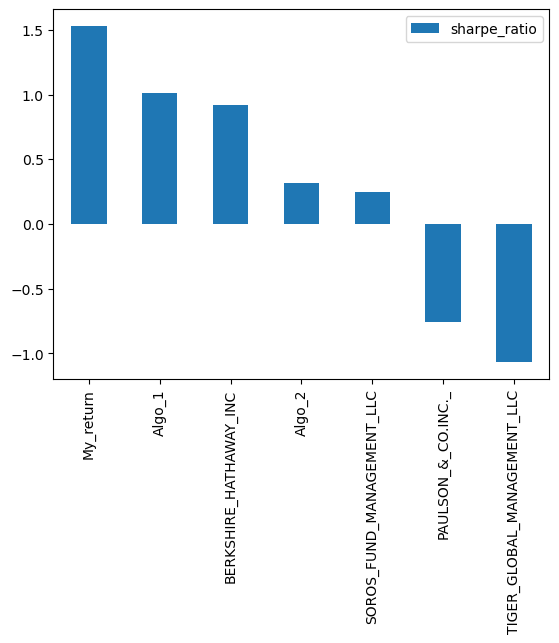

In [192]:
all_sharpe = sharpe_ratio_df(all_combined, True, True)
all_sharpe

In [96]:
# stdev_df(df, annualized = False, sort = False)
# rolling_stdev_df(df, rolling = 21)
# corr_df(df, graph = False)
# covar_df(df, comparing_security = 'Daily_return')
# var_df(df)
# beta_df(df, graph = False, sort = False)
# sharpe_ratio_df(df, graph = False, sort = False)

In [97]:
# Reading data from 1st stock


In [98]:
# Reading data from 2nd stock


In [99]:
# Reading data from 3rd stock


In [100]:
# Combine all stocks in a single DataFrame


In [101]:
# Reset Date index


In [102]:
# Reorganize portfolio data by having a column per symbol


In [103]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [104]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [105]:
# Join your returns DataFrame to the original returns DataFrame


In [106]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [107]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [108]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [109]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [110]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [111]:
# Calculate Annualized Sharpe Ratios


In [112]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!